In [ ]:
! pip install d2l==0.17.0

In [2]:
from d2l import torch as d2l

In [41]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm import tqdm

In [147]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


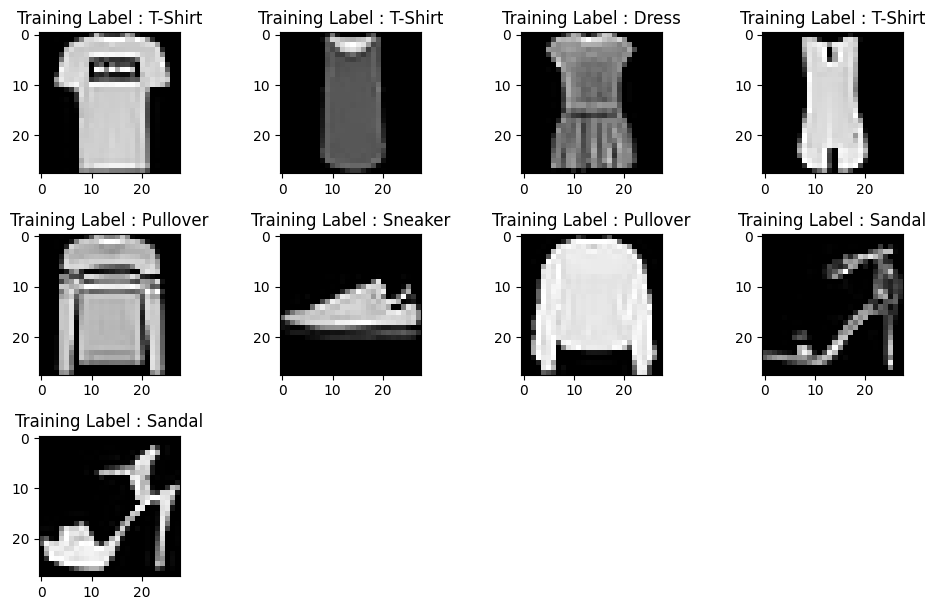

In [5]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [7]:
input_size = 784
out_size = 10

In [143]:
## Define the model
################ Your code ############
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 100),
  nn.ReLU(),
  nn.Linear(100, out_size),
)
#######################################

In [25]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#######################################

In [26]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=10, bias=True)
)


In [27]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.7034425411079483
Training loss: 0.4803157978570029
Training loss: 0.4355907481965988
Training loss: 0.4114120854878985
Training loss: 0.39220709020077293
Training loss: 0.37696011226250925
Training loss: 0.36515482257741855
Training loss: 0.35641055284087847
Training loss: 0.34735773967654465
Training loss: 0.338884073772283


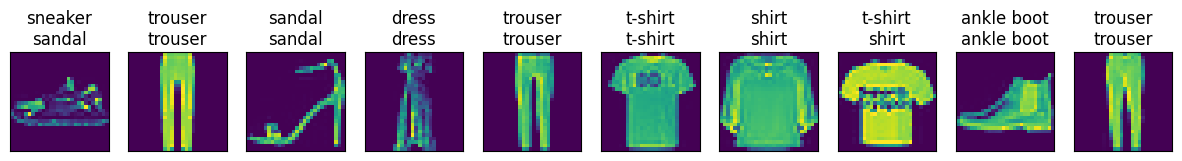

In [29]:
## Test your model
# from d2l import torch as d2l
d2l.predict_ch3(model,testloader,n = 10)

## Part b

In [148]:
def accuracy(yhat, y):
  pred_idx = yhat.max(1, keepdim=True)[1]
  correct = pred_idx.eq(y.view_as(pred_idx)).sum().item()
  return correct / len(y)

In [149]:
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, out_size),
)

In [150]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 10
val_per_epoch = 1

In [133]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): ReLU()
  (7): Linear(in_features=32, out_features=16, bias=True)
  (8): ReLU()
  (9): Linear(in_features=16, out_features=10, bias=True)
)


In [151]:
history = dict()
history['train_loss'] = list()
history['train_acc'] = list()
history['val_loss'] = list()
history['val_acc'] = list()

for epoch in range(n_epochs):
  running_loss = 0.0
  running_acc = 0
  model.train()

  for idx, (x, y) in enumerate(tqdm(trainloader)):
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_acc += accuracy(yhat, y)

  running_loss /= len(trainloader)
  running_acc /= len(trainloader)
  history['train_loss'].append(running_loss)
  history['train_acc'].append(running_acc)
  print(f"epoch = {epoch}\ttraining loss = {running_loss}\ttrainig accuracy = {running_acc}")

  if epoch % val_per_epoch == val_per_epoch - 1:
    running_loss = 0.0
    running_acc = 0
    model.train()
    with torch.no_grad():
      for idx, (x, y) in enumerate(tqdm(testloader)):
        yhat = model(x)
        loss = criterion(yhat, y)

        running_loss += loss.item()
        running_acc += accuracy(yhat, y)

      running_loss /= len(testloader)
      running_acc /= len(testloader)
      history['val_loss'].append(running_loss)
      history['val_acc'].append(running_acc)
      print(f"epoch = {epoch}\tvalidation loss = {running_loss}\tvalidation accuracy = {running_acc}")




100%|██████████| 938/938 [00:17<00:00, 52.56it/s]


epoch = 0	training loss = 1.9821385990327864	trainig accuracy = 0.253914578891258


100%|██████████| 157/157 [00:02<00:00, 66.66it/s]


epoch = 0	validation loss = 1.2057726998238047	validation accuracy = 0.5075636942675159


 16%|█▌        | 152/938 [00:02<00:13, 60.01it/s]


KeyboardInterrupt: ignored

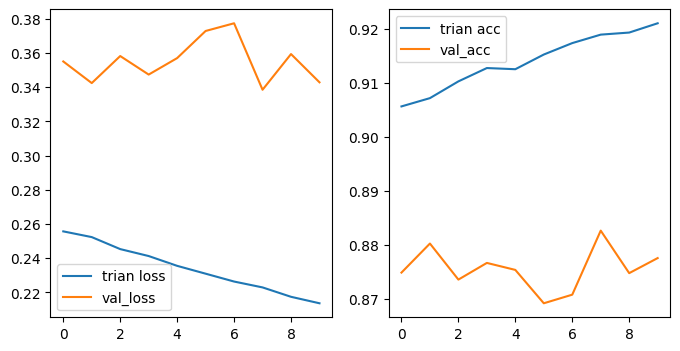

In [105]:
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(history['train_loss'], label='trian loss')
axis[0].plot(history['val_loss'], label='val_loss')
axis[0].legend()

axis[1].plot(history['train_acc'], label='trian acc')
axis[1].plot(history['val_acc'], label='val_acc')
axis[1].legend()


## Part c

In [183]:
classes = range(10)
train_transform = transforms.Compose(
                    [
                    # transforms.ToPILImage(),
                    transforms.RandomRotation(5),
                    # transforms.RandomAffine(degrees=2, translate=(0.1,0.1), scale=(0.9, 1.1)),
                    transforms.ColorJitter(brightness=0.02, contrast=0.02),
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,)),
                    ])

test_transform = transforms.Compose(
                    [
                    # transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,)),
                    ])


# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)


In [184]:
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, out_size),
)

In [185]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): ReLU()
  (7): Linear(in_features=32, out_features=16, bias=True)
  (8): ReLU()
  (9): Linear(in_features=16, out_features=10, bias=True)
)


In [192]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
n_epochs = 10
val_per_epoch = 1

In [193]:
history = dict()
history['train_loss'] = list()
history['train_acc'] = list()
history['val_loss'] = list()
history['val_acc'] = list()

for epoch in range(n_epochs):
  running_loss = 0.0
  running_acc = 0
  model.train()

  for idx, (x, y) in enumerate(tqdm(trainloader)):
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_acc += accuracy(yhat, y)

  running_loss /= len(trainloader)
  running_acc /= len(trainloader)
  history['train_loss'].append(running_loss)
  history['train_acc'].append(running_acc)
  print(f"epoch = {epoch}\ttraining loss = {running_loss}\ttrainig accuracy = {running_acc}")

  if epoch % val_per_epoch == val_per_epoch - 1:
    running_loss = 0.0
    running_acc = 0
    model.train()
    with torch.no_grad():
      for idx, (x, y) in enumerate(tqdm(testloader)):
        yhat = model(x)
        loss = criterion(yhat, y)

        running_loss += loss.item()
        running_acc += accuracy(yhat, y)

      running_loss /= len(testloader)
      running_acc /= len(testloader)
      history['val_loss'].append(running_loss)
      history['val_acc'].append(running_acc)
      print(f"epoch = {epoch}\tvalidation loss = {running_loss}\tvalidation accuracy = {running_acc}")


100%|██████████| 938/938 [00:49<00:00, 18.89it/s]


epoch = 0	training loss = 0.4916424555723855	trainig accuracy = 0.8141324626865671


100%|██████████| 157/157 [00:02<00:00, 70.05it/s]


epoch = 0	validation loss = 0.43787245158177274	validation accuracy = 0.8362858280254777


100%|██████████| 938/938 [00:48<00:00, 19.38it/s]


epoch = 1	training loss = 0.48990540319223647	trainig accuracy = 0.8152152185501066


100%|██████████| 157/157 [00:03<00:00, 49.45it/s]


epoch = 1	validation loss = 0.44034292259413726	validation accuracy = 0.8341958598726115


100%|██████████| 938/938 [00:47<00:00, 19.86it/s]


epoch = 2	training loss = 0.4867195464305278	trainig accuracy = 0.8159315031982942


100%|██████████| 157/157 [00:03<00:00, 51.04it/s]


epoch = 2	validation loss = 0.43371329176577794	validation accuracy = 0.8378781847133758


100%|██████████| 938/938 [00:46<00:00, 20.19it/s]


epoch = 3	training loss = 0.4873808020435925	trainig accuracy = 0.8170808901918977


100%|██████████| 157/157 [00:02<00:00, 65.46it/s]


epoch = 3	validation loss = 0.4317313180227948	validation accuracy = 0.8392714968152867


100%|██████████| 938/938 [00:44<00:00, 21.13it/s]


epoch = 4	training loss = 0.4842135789297791	trainig accuracy = 0.8175972814498934


100%|██████████| 157/157 [00:02<00:00, 71.88it/s]


epoch = 4	validation loss = 0.43794889520308017	validation accuracy = 0.835390127388535


100%|██████████| 938/938 [00:45<00:00, 20.41it/s]


epoch = 5	training loss = 0.48398903584175273	trainig accuracy = 0.8167144189765458


100%|██████████| 157/157 [00:02<00:00, 71.40it/s]


epoch = 5	validation loss = 0.42911358310538494	validation accuracy = 0.8378781847133758


100%|██████████| 938/938 [00:46<00:00, 20.11it/s]


epoch = 6	training loss = 0.4830974032566237	trainig accuracy = 0.8186467217484008


100%|██████████| 157/157 [00:02<00:00, 69.67it/s]


epoch = 6	validation loss = 0.43781654755021354	validation accuracy = 0.834593949044586


100%|██████████| 938/938 [00:47<00:00, 19.86it/s]


epoch = 7	training loss = 0.48405251645647895	trainig accuracy = 0.8185967484008528


100%|██████████| 157/157 [00:02<00:00, 72.34it/s]


epoch = 7	validation loss = 0.42907713571931144	validation accuracy = 0.8384753184713376


100%|██████████| 938/938 [00:46<00:00, 20.10it/s]


epoch = 8	training loss = 0.4794673586863953	trainig accuracy = 0.8195795575692963


100%|██████████| 157/157 [00:03<00:00, 50.96it/s]


epoch = 8	validation loss = 0.42655767367523945	validation accuracy = 0.8400676751592356


100%|██████████| 938/938 [00:44<00:00, 21.18it/s]


epoch = 9	training loss = 0.4821889855142341	trainig accuracy = 0.8189299040511727


100%|██████████| 157/157 [00:02<00:00, 72.46it/s]

epoch = 9	validation loss = 0.42742191891002046	validation accuracy = 0.8394705414012739


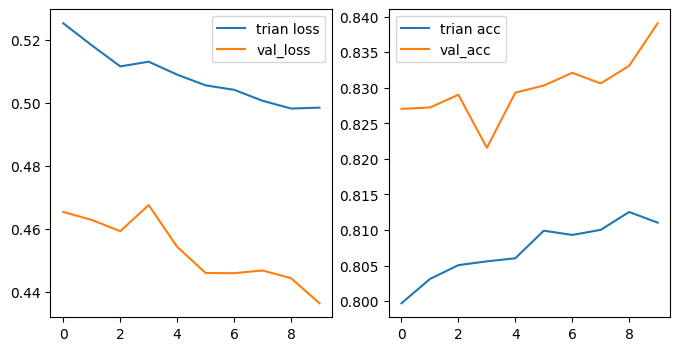

In [191]:
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(history['train_loss'], label='trian loss')
axis[0].plot(history['val_loss'], label='val_loss')
axis[0].legend()

axis[1].plot(history['train_acc'], label='trian acc')
axis[1].plot(history['val_acc'], label='val_acc')
axis[1].legend()

# part D

In [205]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

In [206]:
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, out_size),
)

In [207]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): ReLU()
  (7): Linear(in_features=32, out_features=16, bias=True)
  (8): ReLU()
  (9): Linear(in_features=16, out_features=10, bias=True)
)


In [208]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-3)
n_epochs = 10
val_per_epoch = 1

In [209]:
history = dict()
history['train_loss'] = list()
history['train_acc'] = list()
history['val_loss'] = list()
history['val_acc'] = list()

for epoch in range(n_epochs):
  running_loss = 0.0
  running_acc = 0
  model.train()

  for idx, (x, y) in enumerate(tqdm(trainloader)):
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_acc += accuracy(yhat, y)

  running_loss /= len(trainloader)
  running_acc /= len(trainloader)
  history['train_loss'].append(running_loss)
  history['train_acc'].append(running_acc)
  print(f"epoch = {epoch}\ttraining loss = {running_loss}\ttrainig accuracy = {running_acc}")

  if epoch % val_per_epoch == val_per_epoch - 1:
    running_loss = 0.0
    running_acc = 0
    model.train()
    with torch.no_grad():
      for idx, (x, y) in enumerate(tqdm(testloader)):
        yhat = model(x)
        loss = criterion(yhat, y)

        running_loss += loss.item()
        running_acc += accuracy(yhat, y)

      running_loss /= len(testloader)
      running_acc /= len(testloader)
      history['val_loss'].append(running_loss)
      history['val_acc'].append(running_acc)
      print(f"epoch = {epoch}\tvalidation loss = {running_loss}\tvalidation accuracy = {running_acc}")


100%|██████████| 938/938 [00:16<00:00, 57.03it/s]


epoch = 0	training loss = 1.5397242709263554	trainig accuracy = 0.41694429637526653


100%|██████████| 157/157 [00:02<00:00, 54.63it/s]


epoch = 0	validation loss = 0.8447142376261911	validation accuracy = 0.6564490445859873


100%|██████████| 938/938 [00:16<00:00, 57.04it/s]


epoch = 1	training loss = 0.7151495270065661	trainig accuracy = 0.7143190298507462


100%|██████████| 157/157 [00:02<00:00, 75.33it/s]


epoch = 1	validation loss = 0.6864116539241402	validation accuracy = 0.7353702229299363


100%|██████████| 938/938 [00:14<00:00, 63.09it/s]


epoch = 2	training loss = 0.5935106643163828	trainig accuracy = 0.7839485607675906


100%|██████████| 157/157 [00:02<00:00, 78.32it/s]


epoch = 2	validation loss = 0.5729729675563278	validation accuracy = 0.7971735668789809


100%|██████████| 938/938 [00:16<00:00, 57.67it/s]


epoch = 3	training loss = 0.5137798526743328	trainig accuracy = 0.8177971748400853


100%|██████████| 157/157 [00:02<00:00, 71.50it/s]


epoch = 3	validation loss = 0.5687417059567323	validation accuracy = 0.794187898089172


100%|██████████| 938/938 [00:17<00:00, 54.51it/s]


epoch = 4	training loss = 0.4679345333817671	trainig accuracy = 0.8349546908315565


100%|██████████| 157/157 [00:02<00:00, 60.70it/s]


epoch = 4	validation loss = 0.5066505809118793	validation accuracy = 0.818968949044586


100%|██████████| 938/938 [00:16<00:00, 56.83it/s]


epoch = 5	training loss = 0.4346545981382256	trainig accuracy = 0.8448827292110874


100%|██████████| 157/157 [00:02<00:00, 54.85it/s]


epoch = 5	validation loss = 0.47006263085611305	validation accuracy = 0.8314092356687898


100%|██████████| 938/938 [00:18<00:00, 51.76it/s]


epoch = 6	training loss = 0.40811033419835796	trainig accuracy = 0.8544942697228145


100%|██████████| 157/157 [00:02<00:00, 67.39it/s]


epoch = 6	validation loss = 0.42965975716994825	validation accuracy = 0.8471337579617835


100%|██████████| 938/938 [00:16<00:00, 58.49it/s]


epoch = 7	training loss = 0.3892647183335412	trainig accuracy = 0.8608408848614072


100%|██████████| 157/157 [00:02<00:00, 59.44it/s]


epoch = 7	validation loss = 0.416784614134746	validation accuracy = 0.8517117834394905


100%|██████████| 938/938 [00:16<00:00, 57.28it/s]


epoch = 8	training loss = 0.3724496869930326	trainig accuracy = 0.8660214552238806


100%|██████████| 157/157 [00:03<00:00, 48.54it/s]


epoch = 8	validation loss = 0.40333123846798186	validation accuracy = 0.85828025477707


100%|██████████| 938/938 [00:17<00:00, 53.73it/s]


epoch = 9	training loss = 0.35759260899413114	trainig accuracy = 0.8701359275053305


100%|██████████| 157/157 [00:02<00:00, 71.38it/s]

epoch = 9	validation loss = 0.3868975487484294	validation accuracy = 0.8603702229299363


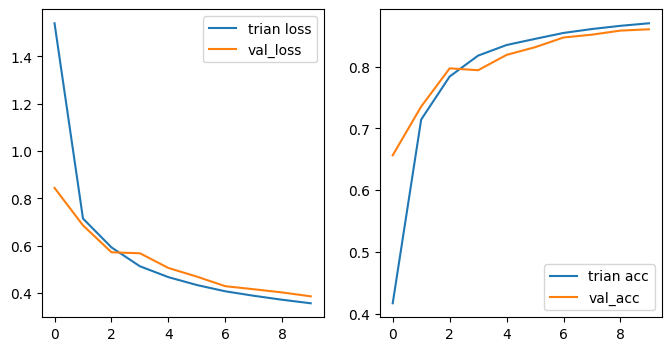

In [210]:
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(history['train_loss'], label='trian loss')
axis[0].plot(history['val_loss'], label='val_loss')
axis[0].legend()

axis[1].plot(history['train_acc'], label='trian acc')
axis[1].plot(history['val_acc'], label='val_acc')
axis[1].legend()

# part E

In [211]:
classes = range(10)
train_transform = transforms.Compose(
                    [
                    # transforms.ToPILImage(),
                    transforms.RandomRotation(5),
                    # transforms.RandomAffine(degrees=2, translate=(0.1,0.1), scale=(0.9, 1.1)),
                    transforms.ColorJitter(brightness=0.02, contrast=0.02),
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,)),
                    ])

test_transform = transforms.Compose(
                    [
                    # transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize((0.1307,), (0.3081,)),
                    ])


# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)


In [214]:
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Dropout(0.2),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, out_size),
)

In [215]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.2, inplace=False)
  (8): Linear(in_features=32, out_features=16, bias=True)
  (9): ReLU()
  (10): Linear(in_features=16, out_features=10, bias=True)
)


In [216]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
n_epochs = 10
val_per_epoch = 1

In [217]:
history = dict()
history['train_loss'] = list()
history['train_acc'] = list()
history['val_loss'] = list()
history['val_acc'] = list()

for epoch in range(n_epochs):
  running_loss = 0.0
  running_acc = 0
  model.train()

  for idx, (x, y) in enumerate(tqdm(trainloader)):
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_acc += accuracy(yhat, y)

  running_loss /= len(trainloader)
  running_acc /= len(trainloader)
  history['train_loss'].append(running_loss)
  history['train_acc'].append(running_acc)
  print(f"epoch = {epoch}\ttraining loss = {running_loss}\ttrainig accuracy = {running_acc}")

  if epoch % val_per_epoch == val_per_epoch - 1:
    running_loss = 0.0
    running_acc = 0
    model.train()
    with torch.no_grad():
      for idx, (x, y) in enumerate(tqdm(testloader)):
        yhat = model(x)
        loss = criterion(yhat, y)

        running_loss += loss.item()
        running_acc += accuracy(yhat, y)

      running_loss /= len(testloader)
      running_acc /= len(testloader)
      history['val_loss'].append(running_loss)
      history['val_acc'].append(running_acc)
      print(f"epoch = {epoch}\tvalidation loss = {running_loss}\tvalidation accuracy = {running_acc}")


100%|██████████| 938/938 [00:50<00:00, 18.43it/s]


epoch = 0	training loss = 2.196401898413579	trainig accuracy = 0.18721681769722814


100%|██████████| 157/157 [00:02<00:00, 70.90it/s]


epoch = 0	validation loss = 1.9738750715923916	validation accuracy = 0.2598527070063694


100%|██████████| 938/938 [00:58<00:00, 15.98it/s]


epoch = 1	training loss = 1.5620583884243264	trainig accuracy = 0.4039012526652452


100%|██████████| 157/157 [00:02<00:00, 69.94it/s]


epoch = 1	validation loss = 1.2056895528629328	validation accuracy = 0.5469745222929936


100%|██████████| 938/938 [00:43<00:00, 21.37it/s]


epoch = 2	training loss = 1.0455292585943299	trainig accuracy = 0.6080257196162047


100%|██████████| 157/157 [00:02<00:00, 72.08it/s]


epoch = 2	validation loss = 0.9073819988852094	validation accuracy = 0.6553542993630573


100%|██████████| 938/938 [00:44<00:00, 21.09it/s]


epoch = 3	training loss = 0.8191325707730454	trainig accuracy = 0.699193763326226


100%|██████████| 157/157 [00:02<00:00, 70.07it/s]


epoch = 3	validation loss = 0.7678452840276585	validation accuracy = 0.7259156050955414


100%|██████████| 938/938 [00:58<00:00, 16.06it/s]


epoch = 4	training loss = 0.7106283139636014	trainig accuracy = 0.7463186300639659


100%|██████████| 157/157 [00:03<00:00, 47.47it/s]


epoch = 4	validation loss = 0.6767431516556224	validation accuracy = 0.7590565286624203


100%|██████████| 938/938 [00:48<00:00, 19.34it/s]


epoch = 5	training loss = 0.646082597024151	trainig accuracy = 0.7729044509594882


100%|██████████| 157/157 [00:02<00:00, 53.65it/s]


epoch = 5	validation loss = 0.6295572492727048	validation accuracy = 0.7819466560509554


100%|██████████| 938/938 [00:45<00:00, 20.54it/s]


epoch = 6	training loss = 0.6001386197327551	trainig accuracy = 0.7904950692963753


100%|██████████| 157/157 [00:02<00:00, 69.26it/s]


epoch = 6	validation loss = 0.6091550541151861	validation accuracy = 0.7897093949044586


100%|██████████| 938/938 [00:46<00:00, 20.12it/s]


epoch = 7	training loss = 0.5658426863997221	trainig accuracy = 0.8025219882729211


100%|██████████| 157/157 [00:02<00:00, 54.68it/s]


epoch = 7	validation loss = 0.5704228187062937	validation accuracy = 0.8008558917197452


100%|██████████| 938/938 [00:45<00:00, 20.84it/s]


epoch = 8	training loss = 0.5399285599049221	trainig accuracy = 0.810717617270789


100%|██████████| 157/157 [00:02<00:00, 58.32it/s]


epoch = 8	validation loss = 0.5452108970683092	validation accuracy = 0.8095143312101911


100%|██████████| 938/938 [00:46<00:00, 20.19it/s]


epoch = 9	training loss = 0.5176456427332689	trainig accuracy = 0.8187466684434968


100%|██████████| 157/157 [00:02<00:00, 57.88it/s]

epoch = 9	validation loss = 0.5452203323507006	validation accuracy = 0.806031050955414


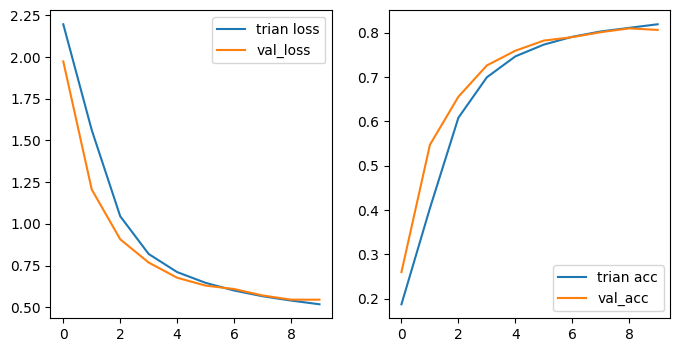

In [218]:
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(history['train_loss'], label='trian loss')
axis[0].plot(history['val_loss'], label='val_loss')
axis[0].legend()

axis[1].plot(history['train_acc'], label='trian acc')
axis[1].plot(history['val_acc'], label='val_acc')
axis[1].legend()

In [219]:
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, out_size),
)

In [220]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): ReLU()
  (7): Linear(in_features=32, out_features=16, bias=True)
  (8): ReLU()
  (9): Linear(in_features=16, out_features=10, bias=True)
)


In [221]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, weight_decay=1e-3)
n_epochs = 10
val_per_epoch = 1

In [222]:
history = dict()
history['train_loss'] = list()
history['train_acc'] = list()
history['val_loss'] = list()
history['val_acc'] = list()

for epoch in range(n_epochs):
  running_loss = 0.0
  running_acc = 0
  model.train()

  for idx, (x, y) in enumerate(tqdm(trainloader)):
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_acc += accuracy(yhat, y)

  running_loss /= len(trainloader)
  running_acc /= len(trainloader)
  history['train_loss'].append(running_loss)
  history['train_acc'].append(running_acc)
  print(f"epoch = {epoch}\ttraining loss = {running_loss}\ttrainig accuracy = {running_acc}")

  if epoch % val_per_epoch == val_per_epoch - 1:
    running_loss = 0.0
    running_acc = 0
    model.train()
    with torch.no_grad():
      for idx, (x, y) in enumerate(tqdm(testloader)):
        yhat = model(x)
        loss = criterion(yhat, y)

        running_loss += loss.item()
        running_acc += accuracy(yhat, y)

      running_loss /= len(testloader)
      running_acc /= len(testloader)
      history['val_loss'].append(running_loss)
      history['val_acc'].append(running_acc)
      print(f"epoch = {epoch}\tvalidation loss = {running_loss}\tvalidation accuracy = {running_acc}")


100%|██████████| 938/938 [00:47<00:00, 19.90it/s]


epoch = 0	training loss = 2.069449423726942	trainig accuracy = 0.21548507462686567


100%|██████████| 157/157 [00:02<00:00, 71.08it/s]


epoch = 0	validation loss = 1.6428998139253848	validation accuracy = 0.37062101910828027


100%|██████████| 938/938 [00:44<00:00, 21.23it/s]


epoch = 1	training loss = 1.1624596700993681	trainig accuracy = 0.5678138326226013


100%|██████████| 157/157 [00:03<00:00, 51.05it/s]


epoch = 1	validation loss = 0.8797841504880577	validation accuracy = 0.6415207006369427


100%|██████████| 938/938 [00:45<00:00, 20.79it/s]


epoch = 2	training loss = 0.7911233696729135	trainig accuracy = 0.6877165511727079


100%|██████████| 157/157 [00:02<00:00, 69.63it/s]


epoch = 2	validation loss = 0.7613493485055911	validation accuracy = 0.7104896496815286


100%|██████████| 938/938 [00:46<00:00, 20.17it/s]


epoch = 3	training loss = 0.6796141705596879	trainig accuracy = 0.7505330490405118


100%|██████████| 157/157 [00:03<00:00, 43.28it/s]


epoch = 3	validation loss = 0.6325829213212251	validation accuracy = 0.7745820063694268


100%|██████████| 938/938 [00:44<00:00, 21.31it/s]


epoch = 4	training loss = 0.6007246469129631	trainig accuracy = 0.7816164712153518


100%|██████████| 157/157 [00:02<00:00, 73.92it/s]


epoch = 4	validation loss = 0.5784202779933905	validation accuracy = 0.7918988853503185


100%|██████████| 938/938 [00:45<00:00, 20.80it/s]


epoch = 5	training loss = 0.554957174304833	trainig accuracy = 0.800956156716418


100%|██████████| 157/157 [00:02<00:00, 73.05it/s]


epoch = 5	validation loss = 0.5383408426479169	validation accuracy = 0.8024482484076433


100%|██████████| 938/938 [00:45<00:00, 20.83it/s]


epoch = 6	training loss = 0.5227506215543126	trainig accuracy = 0.8131329957356077


100%|██████████| 157/157 [00:02<00:00, 63.88it/s]


epoch = 6	validation loss = 0.5319439461276789	validation accuracy = 0.8046377388535032


100%|██████████| 938/938 [00:43<00:00, 21.53it/s]


epoch = 7	training loss = 0.495192114271716	trainig accuracy = 0.8227778518123667


100%|██████████| 157/157 [00:03<00:00, 49.55it/s]


epoch = 7	validation loss = 0.5355455918107063	validation accuracy = 0.805234872611465


100%|██████████| 938/938 [00:43<00:00, 21.54it/s]


epoch = 8	training loss = 0.47171340700088027	trainig accuracy = 0.831972947761194


100%|██████████| 157/157 [00:02<00:00, 75.71it/s]


epoch = 8	validation loss = 0.5166020319340335	validation accuracy = 0.8128980891719745


100%|██████████| 938/938 [00:48<00:00, 19.51it/s]


epoch = 9	training loss = 0.4504983436737233	trainig accuracy = 0.8393523454157783


100%|██████████| 157/157 [00:02<00:00, 73.40it/s]

epoch = 9	validation loss = 0.4652035321779312	validation accuracy = 0.8301154458598726


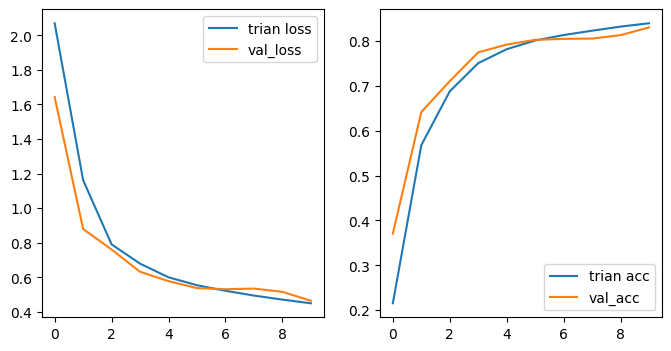

In [223]:
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(history['train_loss'], label='trian loss')
axis[0].plot(history['val_loss'], label='val_loss')
axis[0].legend()

axis[1].plot(history['train_acc'], label='trian acc')
axis[1].plot(history['val_acc'], label='val_acc')
axis[1].legend()

In [224]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

In [225]:
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 128),
  nn.ReLU(),
  nn.Linear(128, 64),
  nn.ReLU(),
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Dropout(0.2),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, out_size),
)

In [226]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.2, inplace=False)
  (8): Linear(in_features=32, out_features=16, bias=True)
  (9): ReLU()
  (10): Linear(in_features=16, out_features=10, bias=True)
)


In [227]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, weight_decay=1e-3)
n_epochs = 10
val_per_epoch = 1

In [228]:
history = dict()
history['train_loss'] = list()
history['train_acc'] = list()
history['val_loss'] = list()
history['val_acc'] = list()

for epoch in range(n_epochs):
  running_loss = 0.0
  running_acc = 0
  model.train()

  for idx, (x, y) in enumerate(tqdm(trainloader)):
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    running_acc += accuracy(yhat, y)

  running_loss /= len(trainloader)
  running_acc /= len(trainloader)
  history['train_loss'].append(running_loss)
  history['train_acc'].append(running_acc)
  print(f"epoch = {epoch}\ttraining loss = {running_loss}\ttrainig accuracy = {running_acc}")

  if epoch % val_per_epoch == val_per_epoch - 1:
    running_loss = 0.0
    running_acc = 0
    model.train()
    with torch.no_grad():
      for idx, (x, y) in enumerate(tqdm(testloader)):
        yhat = model(x)
        loss = criterion(yhat, y)

        running_loss += loss.item()
        running_acc += accuracy(yhat, y)

      running_loss /= len(testloader)
      running_acc /= len(testloader)
      history['val_loss'].append(running_loss)
      history['val_acc'].append(running_acc)
      print(f"epoch = {epoch}\tvalidation loss = {running_loss}\tvalidation accuracy = {running_acc}")


100%|██████████| 938/938 [00:15<00:00, 60.30it/s]


epoch = 0	training loss = 2.1680561217672025	trainig accuracy = 0.21568496801705758


100%|██████████| 157/157 [00:02<00:00, 73.82it/s]


epoch = 0	validation loss = 1.7723316227554515	validation accuracy = 0.32862261146496813


100%|██████████| 938/938 [00:16<00:00, 56.52it/s]


epoch = 1	training loss = 1.294876320339215	trainig accuracy = 0.4898720682302772


100%|██████████| 157/157 [00:02<00:00, 58.06it/s]


epoch = 1	validation loss = 1.0376707911491394	validation accuracy = 0.5815087579617835


100%|██████████| 938/938 [00:16<00:00, 57.15it/s]


epoch = 2	training loss = 0.937954684119743	trainig accuracy = 0.6298807302771855


100%|██████████| 157/157 [00:03<00:00, 50.14it/s]


epoch = 2	validation loss = 0.878136396408081	validation accuracy = 0.662718949044586


100%|██████████| 938/938 [00:15<00:00, 60.63it/s]


epoch = 3	training loss = 0.8115960239474453	trainig accuracy = 0.6939798773987207


100%|██████████| 157/157 [00:02<00:00, 71.63it/s]


epoch = 3	validation loss = 0.7880941760388149	validation accuracy = 0.7110867834394905


100%|██████████| 938/938 [00:16<00:00, 56.24it/s]


epoch = 4	training loss = 0.7360200868613684	trainig accuracy = 0.7327925106609808


100%|██████████| 157/157 [00:02<00:00, 70.98it/s]


epoch = 4	validation loss = 0.7493069610398286	validation accuracy = 0.7232285031847133


100%|██████████| 938/938 [00:15<00:00, 60.47it/s]


epoch = 5	training loss = 0.6854218936868822	trainig accuracy = 0.7579624200426439


100%|██████████| 157/157 [00:03<00:00, 45.02it/s]


epoch = 5	validation loss = 0.7042549017128671	validation accuracy = 0.755672770700637


100%|██████████| 938/938 [00:17<00:00, 54.23it/s]


epoch = 6	training loss = 0.638123901064462	trainig accuracy = 0.7788013059701493


100%|██████████| 157/157 [00:02<00:00, 70.22it/s]


epoch = 6	validation loss = 0.6377879392569232	validation accuracy = 0.7814490445859873


100%|██████████| 938/938 [00:16<00:00, 56.70it/s]


epoch = 7	training loss = 0.5905903734441506	trainig accuracy = 0.7953924573560768


100%|██████████| 157/157 [00:02<00:00, 71.68it/s]


epoch = 7	validation loss = 0.5980248914402762	validation accuracy = 0.7830414012738853


100%|██████████| 938/938 [00:16<00:00, 56.67it/s]


epoch = 8	training loss = 0.5593741910734664	trainig accuracy = 0.8034714818763327


100%|██████████| 157/157 [00:02<00:00, 57.31it/s]


epoch = 8	validation loss = 0.5680796088306768	validation accuracy = 0.8013535031847133


100%|██████████| 938/938 [00:16<00:00, 58.49it/s]


epoch = 9	training loss = 0.5338418012711285	trainig accuracy = 0.8129997334754797


100%|██████████| 157/157 [00:02<00:00, 62.16it/s]

epoch = 9	validation loss = 0.554712159998098	validation accuracy = 0.8066281847133758


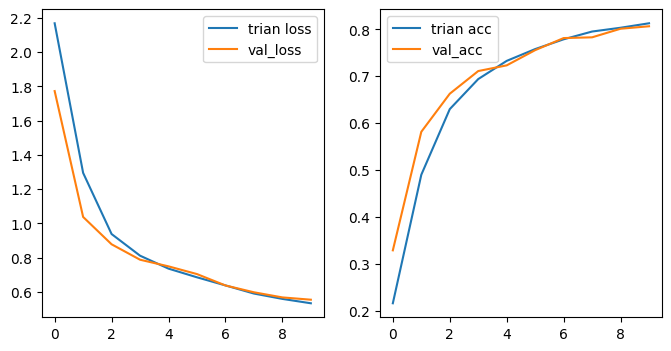

In [229]:
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
axis[0].plot(history['train_loss'], label='trian loss')
axis[0].plot(history['val_loss'], label='val_loss')
axis[0].legend()

axis[1].plot(history['train_acc'], label='trian acc')
axis[1].plot(history['val_acc'], label='val_acc')
axis[1].legend()